In [5]:
# Import all the necessary libraries
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from typing import List, Dict, Tuple
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV

In [6]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
X = np.concatenate((np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)))[:, np.newaxis]

# Set points to evaluate the KDEs
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

# True density of the data to calculate MISE
true_dens = (0.5 * norm(0, 1).pdf(X_plot[:, 0]) + 0.5 * norm(5, 1).pdf(X_plot[:, 0]))

In [11]:
# Function to calculate MISE
def calc_mise(true_density, kde_density, x_plot):
    """Calculate the Mean Integrated Squared Error (MISE) for KDE estimates.
    
    Parameters:
        true_density (np.array): The true density function of the data.
        kde_density (np.array): The KDE density estimate.
        x_plot (np.array): The x values at which the densities are computed.
    
    Returns:
        float: The MISE value.
    """
    mise = np.mean((true_density - kde_density) ** 2)
    return mise

# Function to display KDE with different bandwidths
def plot_kde_bandwidth_and_kernel_comparison(X: np.array, X_plot: np.array, true_dens: np.array, bandwidths: List[float], kernels: List[str]) -> Dict[Tuple[float, str], float]:
    """Plot KDE for different bandwidths and kernels, and return MISE values.
    
    Parameters:
        X (np.array): The input data for KDE.
        X_plot (np.array): The x values to plot the KDE.
        true_dens (np.array): The true density function for comparison.
        bandwidths (List[float]): The list of bandwidths to use for KDE.
        kernels (List[str]): The list of kernels to use for KDE.
    
    Returns:
        Dict[Tuple[float, str], float]: A dictionary with bandwidth and kernel as keys, and corresponding MISE values as values.
    """
    num_plots = len(bandwidths) * len(kernels)
    fig, ax = plt.subplots(num_plots, 1, sharex=True, figsize=(12, num_plots * 2))
    mise_values = {}
    plot_counter = 0
    for bandwidth in bandwidths:
        for kernel in kernels:
            kde = KernelDensity(bandwidth=bandwidth, kernel=kernel)
            kde.fit(X)
            log_dens = kde.score_samples(X_plot)
            kde_density = np.exp(log_dens)
            mise = calc_mise(true_density=true_dens, kde_density=kde_density, x_plot=X_plot[:, 0])
            mise_values[(bandwidth, kernel)] = mise
            
            current_ax = ax[plot_counter] if num_plots > 1 else ax
            current_ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2, label='True density')
            current_ax.fill(X_plot[:, 0], kde_density, fc='#AAAAFF', alpha=0.5, label=f'KDE ({kernel})')
            current_ax.text(6, 0.38, f"Bandwidth: {bandwidth:.2f}, Kernel: {kernel}, MISE: {mise:.5f}")
            current_ax.legend(loc='upper left')
            current_ax.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
            plot_counter += 1
            
    if num_plots > 1:
        ax[-1].set_xlabel('x')
    else:
        ax.set_xlabel('x')
    ax[0].set_title('KDE with different bandwidths and kernels')
    plt.tight_layout()
    plt.show()
    
    return mise_values


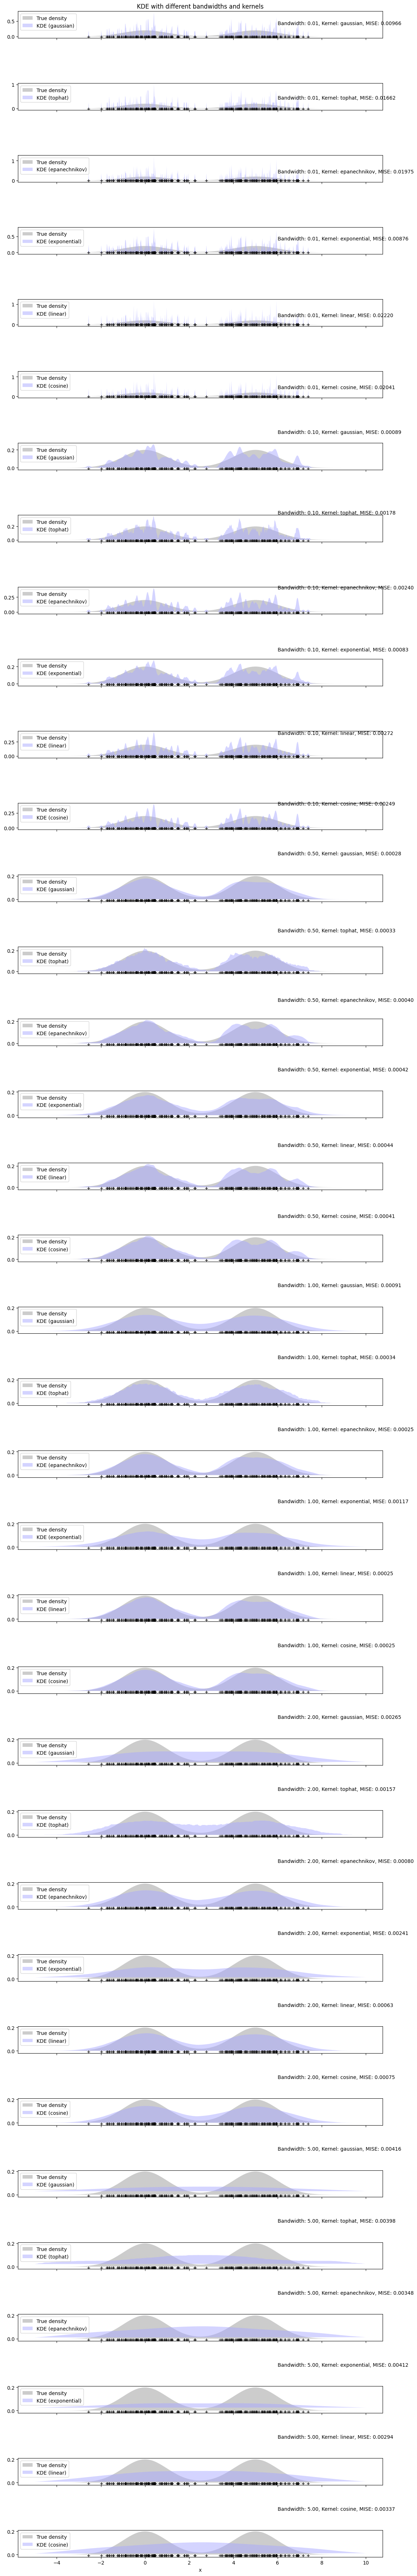

{(0.01, 'gaussian'): 0.009658592543814891, (0.01, 'tophat'): 0.016622116596400602, (0.01, 'epanechnikov'): 0.019751341694356443, (0.01, 'exponential'): 0.008762358658053072, (0.01, 'linear'): 0.022197378900093188, (0.01, 'cosine'): 0.020414591142090217, (0.1, 'gaussian'): 0.0008911259019251457, (0.1, 'tophat'): 0.0017767725511529915, (0.1, 'epanechnikov'): 0.002399747502246054, (0.1, 'exponential'): 0.0008287912685782118, (0.1, 'linear'): 0.0027186918994043367, (0.1, 'cosine'): 0.0024869860756109034, (0.5, 'gaussian'): 0.00027902210904792924, (0.5, 'tophat'): 0.00033145373056389573, (0.5, 'epanechnikov'): 0.0003967560041967989, (0.5, 'exponential'): 0.0004176749009451968, (0.5, 'linear'): 0.000437388186291101, (0.5, 'cosine'): 0.0004070217369529113, (1, 'gaussian'): 0.0009140385576321381, (1, 'tophat'): 0.00034143316380295393, (1, 'epanechnikov'): 0.0002525350138372269, (1, 'exponential'): 0.0011694463049261403, (1, 'linear'): 0.0002540192077081566, (1, 'cosine'): 0.0002509150176915603

In [12]:
bandwidths = [0.01, 0.1, 0.5, 1, 2, 5]
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
mise_values = plot_kde_bandwidth_and_kernel_comparison(X=X, X_plot=X_plot, true_dens=true_dens, bandwidths=bandwidths, kernels=kernels)
print(mise_values)